<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW3/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

In [2]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Homework 1: Maxwell Boltzmann distribution

In Physics, statistics can help us describe the macroscopic behavior of a system if we know its microscopic properties in a statistical sense. We cannot know the motion of each molecule in a gas, but we can know the distribution of their velocities and positions.   In the mid to late 1800s, James Clerk Maxwell and Ludwig Boltzmann modeled the *distribution of speed of molecules in a gas*. As you probably know, and can intuitive realize, the speed of the molecules depends on the temperature of the gas, which is a macroscopic property, the velocity of the molecules is different for different gas temperatures. **This distribution of velocities is called the Maxwell-Boltzmann distribution.**


It turns out that the Maxwel-Boltzmann distribution is a special case of the [*Chi distribution*](https://en.wikipedia.org/wiki/Chi_distribution). The parameter that controls the shape of a Chi distribution is called "degrees of freedom" and the Maxwel-Boltzmann distribution is a Chi distribution _with 3 degrees of freedom_, and with a scale parameter _a_ corresponding to the temperature in some way.


Below I have created 3 distributions. Based on the description above


# 1) label the axes in the plot

Text(0.5, 1.0, 'Maxwell-Boltzmann Distribution (Chi Distribution, df=3)')

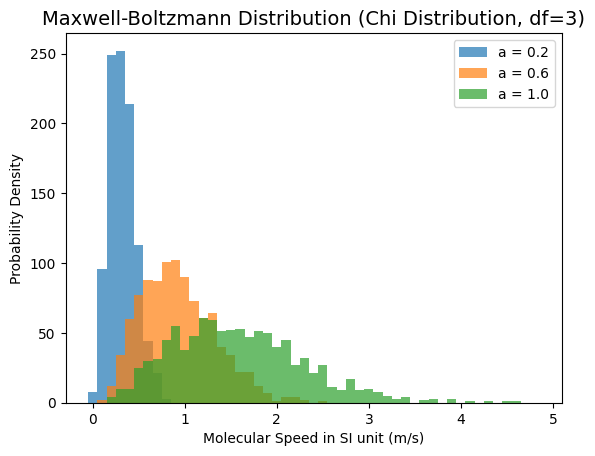

In [9]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a);

pl.legend();

# your code to add labels here
ax.set_xlabel('Molecular Speed in SI unit (m/s)', fontsize=10)
ax.set_ylabel('Probability Density', fontsize=10)
ax.set_title('Maxwell-Boltzmann Distribution (Chi Distribution, df=3)', fontsize=14)

# 2) knowing that the *scale* parameter $a$  is a function of the temperature  *T*, and that the dependency is to a power 1/2, which is correct:
   **$a \propto \sqrt{T}$**  or **$a \propto \sqrt{1/T}$**?

   (in other words, is the dependency on the root of the temperature or on the inverse root of the temperature ?)


 Short answer: $a ∝ √T$: a depends on the root of the temperature

We know from physics, increasing temperature T causes the distribution to widen and shift right , and increasing the scale parameter a causes the exact same change in the distribution's shape (as proven by the plot), the two must be directly proportional.






# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?
From the wikipedia page of the Chi distribution find the formula of the mean of the Chi distribution. The distribution we are using has a scale parameter *a* in addition to the number of degrees of freedom. The mean scales linearly with this parameter:

$\mu_{\mathrm{MB}, k, a} = a \cdot \mu_{\mathrm{chi}, k}$

Using the scipy function ```sp.special.gamma()``` to  calculate the gamma $\Gamma$ function, and the definition of the mean from the [wikipwdia page of the Chi distribution](https://en.wikipedia.org/wiki/Chi_distribution)
**calculate the mean of all three distributions. Compare it with the mean of the empirical distributions I generated in step 1. How does this mean compare to the most probable molecular speed.**
(and does it look right based on the plots above?)

In [ ]:
# your code here

This really only holds for perfect gasses, which means under 4 assumptions:
- the diameter of the molecules is much smaller than the distance between them
- the collisions between molecules conserve energy
- the molecules do not interact between collisions and are not subject to any other forces (move at constant speed in a straight line)
- the initial position and velocity are random.

# Extra Credit:

can you create a python (2D) simulation where the molecules behave as describe and calculate their speed evolution from an initial speed that is gaussian distributed? (rather hard!!)


In [ ]:
# your code here

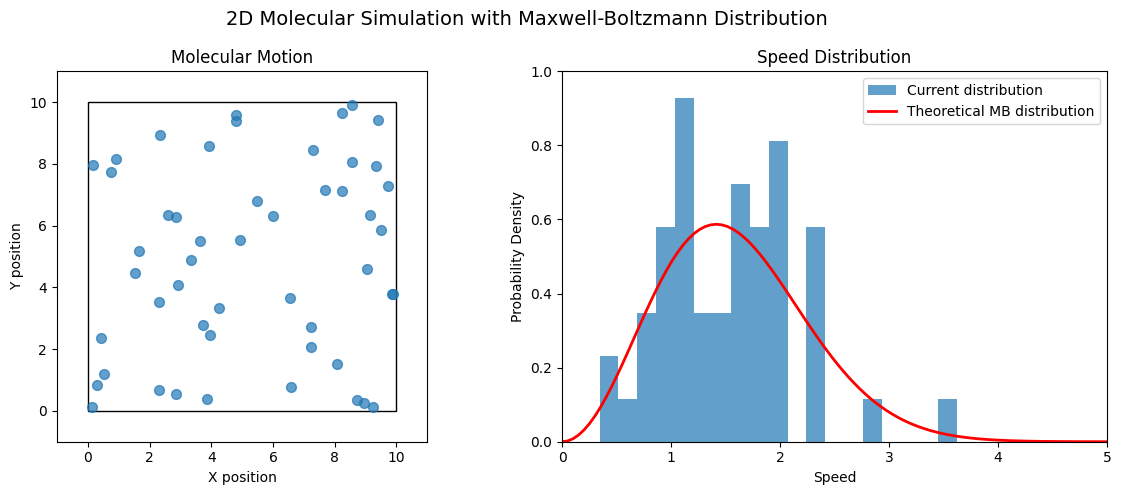

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import scipy.stats as stats

# Simulation parameters
num_molecules = 50
box_size = 10
dt = 0.05
total_time = 10
frames = int(total_time / dt)
temperature = 1.0  # Related to the scale parameter 'a'

# Initialize molecules with Maxwell-Boltzmann distributed speeds
def initialize_molecules(n, temp, box):
    # Positions randomly distributed in the box
    positions = np.random.rand(n, 2) * box

    # Maxwell-Boltzmann distributed speeds (using Chi distribution with df=3)
    speeds = stats.chi.rvs(df=3, scale=np.sqrt(temp), size=n)

    # Random directions
    angles = np.random.rand(n) * 2 * np.pi
    velocities = np.zeros((n, 2))
    velocities[:, 0] = speeds * np.cos(angles)
    velocities[:, 1] = speeds * np.sin(angles)

    return positions, velocities

# Initialize simulation
positions, velocities = initialize_molecules(num_molecules, temperature, box_size)

# Create figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('2D Molecular Simulation with Maxwell-Boltzmann Distribution', fontsize=14)

# Plot the box
box = Rectangle((0, 0), box_size, box_size, fill=False, color='black')
ax1.add_patch(box)
ax1.set_xlim(-1, box_size+1)
ax1.set_ylim(-1, box_size+1)
ax1.set_title('Molecular Motion')
ax1.set_xlabel('X position')
ax1.set_ylabel('Y position')
ax1.set_aspect('equal')

# Scatter plot for molecules
scatter = ax1.scatter(positions[:, 0], positions[:, 1], s=50, alpha=0.7)

# Speed distribution plot
speed_bins = np.linspace(0, 5, 30)
speeds = np.linalg.norm(velocities, axis=1)
hist = ax2.hist(speeds, bins=speed_bins, alpha=0.7, density=True, label='Initial distribution')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 1)
ax2.set_title('Speed Distribution')
ax2.set_xlabel('Speed')
ax2.set_ylabel('Probability Density')

# Plot theoretical Maxwell-Boltzmann distribution
x = np.linspace(0, 5, 100)
scale = np.sqrt(temperature)  # a ∝ √T
theoretical_dist = stats.chi.pdf(x, df=3, scale=scale)
ax2.plot(x, theoretical_dist, 'r-', lw=2, label='Theoretical MB distribution')
ax2.legend()

# Text for displaying statistics
stats_text = ax2.text(0.6, 0.9, '', transform=ax2.transAxes, fontsize=10,
                      bbox=dict(facecolor='white', alpha=0.7))

# Update statistics
def update_stats():
    current_speeds = np.linalg.norm(velocities, axis=1)
    avg_speed = np.mean(current_speeds)
    std_speed = np.std(current_speeds)

    stats_text.set_text(f'Avg speed: {avg_speed:.2f}\nStd speed: {std_speed:.2f}\nTemperature: {temperature:.2f}')

# Update function for animation
def update(frame):
    global positions, velocities

    # Update positions
    positions += velocities * dt

    # Handle wall collisions
    for i in range(num_molecules):
        # Left and right walls
        if positions[i, 0] <= 0 or positions[i, 0] >= box_size:
            velocities[i, 0] *= -1
            positions[i, 0] = np.clip(positions[i, 0], 0, box_size)

        # Top and bottom walls
        if positions[i, 1] <= 0 or positions[i, 1] >= box_size:
            velocities[i, 1] *= -1
            positions[i, 1] = np.clip(positions[i, 1], 0, box_size)

    # Simple molecular collisions (basic implementation)
    for i in range(num_molecules):
        for j in range(i+1, num_molecules):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist < 0.5:  # Collision distance
                # Swap velocities (simple elastic collision)
                velocities[i], velocities[j] = velocities[j].copy(), velocities[i].copy()

    # Update scatter plot
    scatter.set_offsets(positions)

    # Update speed distribution
    current_speeds = np.linalg.norm(velocities, axis=1)
    ax2.clear()
    ax2.hist(current_speeds, bins=speed_bins, alpha=0.7, density=True, label='Current distribution')
    ax2.plot(x, theoretical_dist, 'r-', lw=2, label='Theoretical MB distribution')
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 1)
    ax2.set_title('Speed Distribution')
    ax2.set_xlabel('Speed')
    ax2.set_ylabel('Probability Density')
    ax2.legend()

    update_stats()

    return scatter,

# Create animation
animation = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

plt.tight_layout()
plt.show()